In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.interpolate import make_interp_spline
import pyreadr

from utils import helpers

from importlib import reload

In [2]:
hits_data = pyreadr.read_r('hit_data.rds')[None]

outfield_dims = pyreadr.read_r('fences.rds')[None]

In [13]:
# Get Correct Spray Angles

outfield_dims['spray_angle'] = outfield_dims.apply(lambda x: helpers.spray_angle(x.x, x.y),1) 

hits_data['spray_angle_true'] = hits_data.apply(lambda x: helpers.spray_angle(x.hc_x_, x.hc_y_),1)
outfield_dims['team_abv'] = outfield_dims['team'].apply(lambda x: helpers.mapping[x])

In [ ]:
# Best power hitter, how is that determined?
# just avg distance?
# highest home run percentage?
# 

<AxesSubplot: >

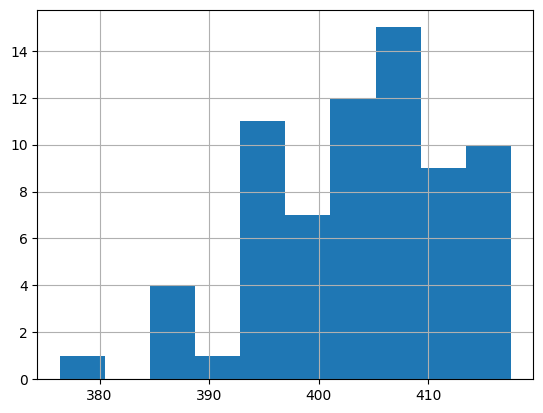

In [12]:
# This is best avg home run hit distance

(
    hits_data.query("events == 'Home Run'")
    .groupby('player_name').agg(avg_hit_dist=('hit_distance_sc','mean'),
                                num_hits=('hit_distance_sc','count'))
    .reset_index()
    .query('num_hits >= 15')
    .sort_values('avg_hit_dist',ascending=False)['avg_hit_dist'].hist()
    )

(0.0, 9.0)

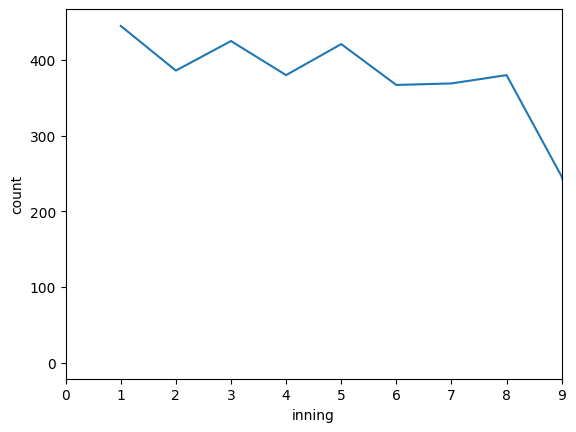

In [69]:
sns.lineplot(hits_data.query('events == "Home Run"').groupby('inning').size().reset_index().rename(columns={0:'count'}),x='inning',y='count')

plt.xlim([0,9])

In [60]:
(
    hits_data.groupby('home_team')['events']
    .count()
    .reset_index()
    .merge(hits_data.query('events == "Home Run"')
                    .groupby('home_team').size().reset_index())
    .rename(columns={0:'dingers'})
    .assign(dinger_perc = lambda x: round(x['dingers'] / x['events'] * 100,2))
    .sort_values('dinger_perc',ascending=False)
)

,home_team,events,dingers,dinger_perc
28,TOR,520,149,28.65
5,CIN,558,155,27.78
2,BAL,517,143,27.66
4,CHC,463,128,27.65
12,LAA,537,145,27.00
13,LAD,529,140,26.47
18,NYY,532,133,25.00
8,CWS,499,123,24.65
6,CLE,488,119,24.39
20,PHI,420,100,23.81


In [32]:
hits_data.query('events == "Home Run"').groupby('home_team').size().sort_values()

home_team
MIA     73
NYM     73
STL     83
DET     88
PIT     90
KC      93
TB      95
SF      96
ARI     99
PHI    100
BOS    109
SEA    112
TEX    113
SD     114
MIL    114
CLE    119
COL    120
OAK    122
CWS    123
WSH    123
CHC    128
HOU    129
NYY    133
ATL    136
LAD    140
BAL    143
MIN    144
LAA    145
TOR    149
CIN    155
dtype: int64

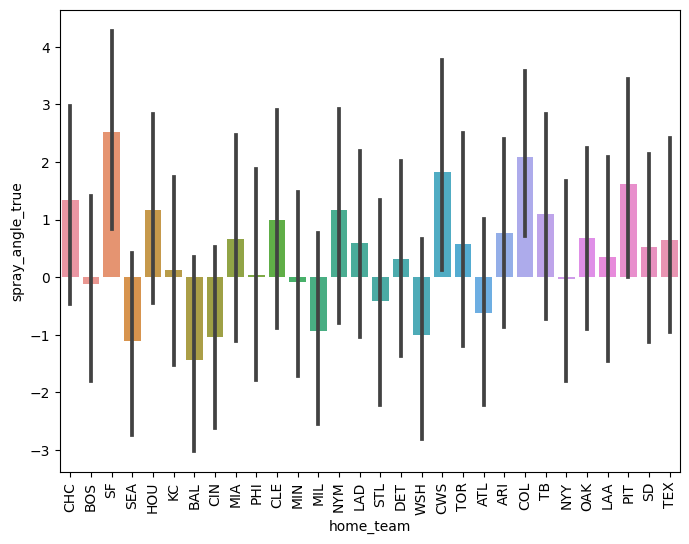

In [29]:
plt.figure(figsize=(8,6))

sns.barplot(hits_data, x='home_team', y='spray_angle_true', estimator='mean', errorbar=('ci',90))

plt.xticks(rotation=90)

plt.show()
